In [66]:
import partitioning

from partitioning.partitioners.dynamic.merge_dynamic_partitioner import MergeDynamicPartitioner
from partitioning.partitioners.dynamic.fine_grained_partitioner import FineGrainedPartitioner
from partitioning.partitioners.dynamic.best_fixed_slice_partitioner import BestFixedSlicePartitioner
from partitioning.partitioners.partitioner import PartitionerArgs

In [67]:
# How to use:
# 1. Generate the circuit you want to use, e.g. in qiskit
from qiskit import QuantumCircuit

In [11]:
#import qiskit
#from qiskit import QuantumCircuit

In [ ]:
# Sample Interaction Marix
# 1 2 3 4 - A1
# 2 3 4 5 - A2
# 1 2 4 5 - A3
# 1 2 3 5 - A4

# No the TRUE circuit, just the interactions given as CX
c = QuantumCircuit(10, 1)
# Row 1
c.cx(0, 5)
c.cx(1, 5)
c.cx(2, 5)
c.cx(3, 5)
c.measure(5, 0)
c.reset(5)

# Row 2
c.cx(1, 5)
c.cx(2, 5)
c.cx(3, 5)
c.cx(4, 5)
c.measure(5, 0)
c.reset(5)

# Row 3
c.cx(0, 5)
c.cx(1, 5)
c.cx(3, 5)
c.cx(4, 5)
c.measure(5, 0)
c.reset(5)

# Row 4
c.cx(0, 5)
c.cx(1, 5)
c.cx(2, 5)
c.cx(4, 5)
c.measure(5, 0)
c.reset(5)

c.draw(fold=-1)

q_0: ──■───────────────────────────────────────────────────────■───────────────────────────■─────────────────────────
       │                                                       │                           │                         
q_1: ──┼────■──────────────────────■───────────────────────────┼────■──────────────────────┼────■────────────────────
       │    │                      │                           │    │                      │    │                    
q_2: ──┼────┼────■─────────────────┼────■──────────────────────┼────┼──────────────────────┼────┼────■───────────────
       │    │    │                 │    │                      │    │                      │    │    │               
q_3: ──┼────┼────┼────■────────────┼────┼────■─────────────────┼────┼────■─────────────────┼────┼────┼───────────────
       │    │    │    │            │    │    │                 │    │    │                 │    │    │               
q_4: ──┼────┼────┼────┼────────────┼────┼────┼────■────────────┼────┼────┼────■────────────┼────┼────┼────■──────────
     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┐     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┐     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┐     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┐     
q_5: ┤ X ├┤ X ├┤ X ├┤ X ├┤M├─|0>─┤ X ├┤ X ├┤ X ├┤ X ├┤M├─|0>─┤ X ├┤ X ├┤ X ├┤ X ├┤M├─|0>─┤ X ├┤ X ├┤ X ├┤ X ├┤M├─|0>─
     └───┘└───┘└───┘└───┘└╥┘     └───┘└───┘└───┘└───┘└╥┘     └───┘└───┘└───┘└───┘└╥┘     └───┘└───┘└───┘└───┘└╥┘     
q_6: ─────────────────────╫───────────────────────────╫───────────────────────────╫───────────────────────────╫──────
                          ║                           ║                           ║                           ║      
q_7: ─────────────────────╫───────────────────────────╫───────────────────────────╫───────────────────────────╫──────
                          ║                           ║                           ║                           ║      
q_8: ─────────────────────╫───────────────────────────╫───────────────────────────╫───────────────────────────╫──────
                          ║                           ║                           ║                           ║      
q_9: ─────────────────────╫───────────────────────────╫───────────────────────────╫───────────────────────────╫──────
                          ║                           ║                           ║                           ║      
c: 1/═════════════════════╩═══════════════════════════╩═══════════════════════════╩═══════════════════════════╩══════
                          0                           0                           0                           0

In [71]:
# Setup the partitioner Args;
# k = # of bucket
# p = size of each bucket
pargs = PartitionerArgs.from_circuit(circ, k=6, p=4)
res = FineGrainedPartitioner().partition_circuit(pargs)
res.path, res.get_duration(), res.get_circuit_depth()

([[set(), {7}, {2, 6}, {0, 1, 5, 10}, {3, 4, 8, 11}, {9}],
  [set(), {7}, {2, 6}, {0, 1, 5, 10}, {3, 4, 8, 11}, {9}],
  [set(), {7}, {2, 6}, {1, 3, 5, 10}, {4, 8, 9, 11}, {0}],
  [set(), {9}, {2, 6}, {1, 3, 7, 10}, {4, 5, 8, 11}, {0}],
  [set(), {9}, {2, 6}, {3, 7, 8, 10}, {1, 4, 5, 11}, {0}],
  [set(), {9}, {4, 6}, {2, 7, 8, 10}, {1, 3, 5, 11}, {0}],
  [set(), {9}, {4, 6}, {2, 7, 8, 10}, {1, 3, 5, 11}, {0}],
  [set(), {9}, {6, 8}, {1, 2, 7, 10}, {3, 4, 5, 11}, {0}],
  [set(), {9}, {2, 6}, {1, 5, 7, 10}, {3, 4, 8, 11}, {0}],
  [set(), {1}, {2, 6}, {3, 5, 7, 10}, {4, 8, 9, 11}, {0}],
  [set(), {4}, {2, 6}, {3, 5, 7, 10}, {1, 8, 9, 11}, {0}],
  [set(), {2}, {6, 8}, {3, 4, 7, 10}, {1, 5, 9, 11}, {0}],
  [set(), {2}, {6, 8}, {3, 4, 10, 11}, {1, 5, 7, 9}, {0}],
  [set(), {2}, {6, 8}, {3, 4, 10, 11}, {1, 5, 7, 9}, {0}],
  [set(), {2}, {6, 8}, {3, 4, 10, 11}, {1, 5, 7, 9}, {0}],
  [set(), {2}, {6, 8}, {3, 4, 10, 11}, {1, 5, 7, 9}, {0}],
  [{9}, set(), {6, 7, 8, 10}, {3, 4}, {1, 2, 5, 11}, {0}

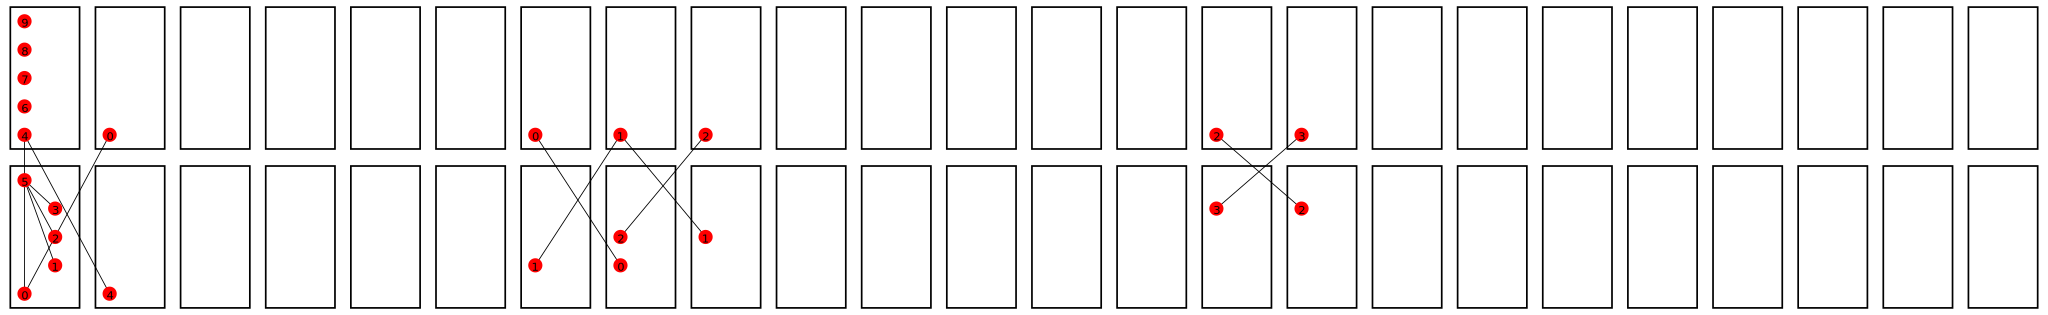

In [ ]:
res.draw()

In [ ]:
# Sample Interaction Marix
# 1 2 3 4 - A1
# 2 3 4 5 - A2
# 1 2 4 5 - A3
# 1 2 3 5 - A4

# No the TRUE circuit, just the interactions given as CX
c = QuantumCircuit(10, 1)
# Row 1
c.cx(0, 5)
c.cx(1, 5)
c.cx(2, 5)
c.cx(3, 5)
c.measure(5, 0)
c.reset(5)

# Row 2
c.cx(1, 6)
c.cx(2, 6)
c.cx(3, 6)
c.cx(4, 6)
c.measure(6, 0)
c.reset(6)

# Row 3
c.cx(0, 5)
c.cx(1, 5)
c.cx(3, 5)
c.cx(4, 5)
c.measure(5, 0)
c.reset(5)

# Row 4
c.cx(0, 6)
c.cx(1, 6)
c.cx(2, 6)
c.cx(4, 6)
c.measure(6, 0)
c.reset(6)

c.draw(fold=-1)

q_0: ──■───────────────────────────────────────────────■──────────────■──────────────────────────────────────
       │                                               │              │                                      
q_1: ──┼────■─────────■────────────────────────────────┼────■─────────┼─────────■────────────────────────────
       │    │         │                                │    │         │         │                            
q_2: ──┼────┼────■────┼─────────■──────────────────────┼────┼─────────┼─────────┼───────■────────────────────
       │    │    │    │         │                      │    │         │         │       │                    
q_3: ──┼────┼────┼────┼────■────┼───────■──────────────┼────┼────■────┼─────────┼───────┼────────────────────
       │    │    │    │    │    │       │              │    │    │    │         │       │                    
q_4: ──┼────┼────┼────┼────┼────┼───────┼─────────■────┼────┼────┼────┼────■────┼───────┼─────────■──────────
     ┌─┴─┐┌─┴─┐┌─┴─┐  │  ┌─┴─┐  │  ┌─┐  │         │  ┌─┴─┐┌─┴─┐┌─┴─┐  │  ┌─┴─┐  │  ┌─┐  │         │          
q_5: ┤ X ├┤ X ├┤ X ├──┼──┤ X ├──┼──┤M├──┼───|0>───┼──┤ X ├┤ X ├┤ X ├──┼──┤ X ├──┼──┤M├──┼───|0>───┼──────────
     └───┘└───┘└───┘┌─┴─┐└───┘┌─┴─┐└╥┘┌─┴─┐     ┌─┴─┐└┬─┬┘└───┘└───┘┌─┴─┐└───┘┌─┴─┐└╥┘┌─┴─┐     ┌─┴─┐┌─┐     
q_6: ───────────────┤ X ├─────┤ X ├─╫─┤ X ├─────┤ X ├─┤M├──|0>──────┤ X ├─────┤ X ├─╫─┤ X ├─────┤ X ├┤M├─|0>─
                    └───┘     └───┘ ║ └───┘     └───┘ └╥┘           └───┘     └───┘ ║ └───┘     └───┘└╥┘     
q_7: ───────────────────────────────╫──────────────────╫────────────────────────────╫─────────────────╫──────
                                    ║                  ║                            ║                 ║      
q_8: ───────────────────────────────╫──────────────────╫────────────────────────────╫─────────────────╫──────
                                    ║                  ║                            ║                 ║      
q_9: ───────────────────────────────╫──────────────────╫────────────────────────────╫─────────────────╫──────
                                    ║                  ║                            ║                 ║      
c: 1/═══════════════════════════════╩══════════════════╩════════════════════════════╩═════════════════╩══════
                                    0                  0                            0                 0

In [70]:
# Setup the partitioner Args;
# k = # of bucket
# p = size of each bucket
pargs = PartitionerArgs.from_circuit(circ, k=2, p=4)
res = MergeDynamicPartitioner().partition_circuit(pargs)
res.path, res.get_duration(), res.get_circuit_depth()

IndexError: index 10 is out of bounds for axis 1 with size 10

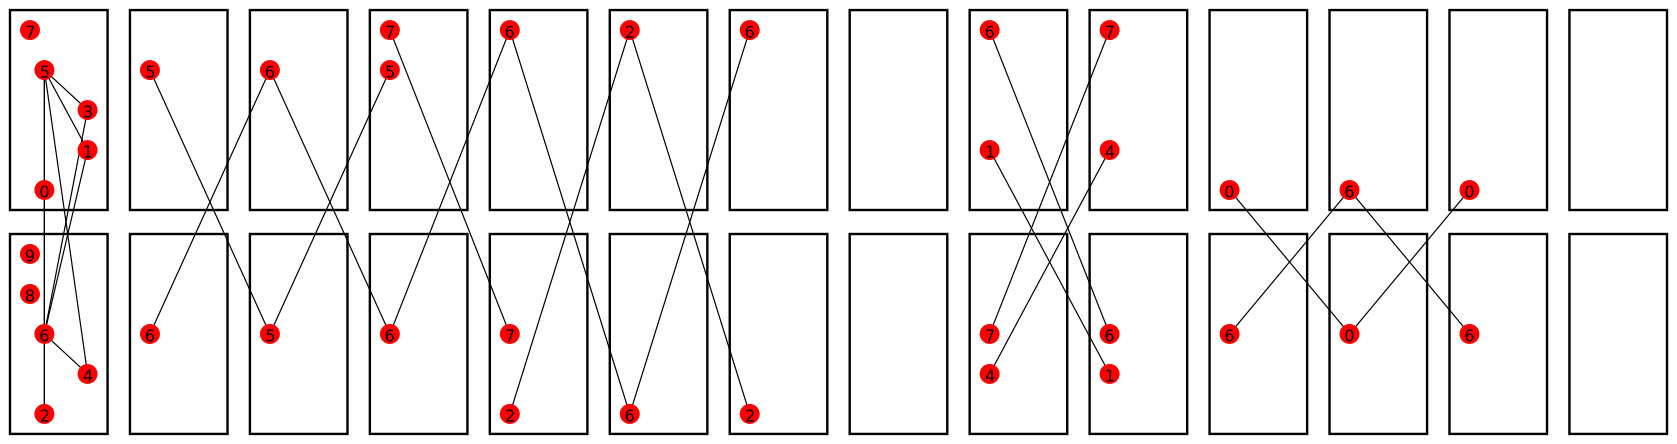

In [ ]:
res.draw()

In [ ]:
# Sample Interaction Marix
# 1 2 3 4 - A1
# 2 3 4 5 - A2
# 1 2 4 5 - A3
# 1 2 3 5 - A4

# No the TRUE circuit, just the interactions given as CX
c = QuantumCircuit(10, 1)
# Row 1
c.cx(0, 5)
c.cx(1, 5)
c.cx(2, 5)
c.cx(3, 5)
c.measure(5, 0)
c.reset(5)

# Row 2
c.cx(1, 5)
c.cx(2, 5)
c.cx(3, 5)
c.cx(4, 5)
c.measure(5, 0)
c.reset(5)

# Row 3
c.cx(0, 6)
c.cx(1, 6)
c.cx(3, 6)
c.cx(4, 6)
c.measure(6, 0)
c.reset(6)

# Row 4
c.cx(0, 6)
c.cx(1, 6)
c.cx(2, 6)
c.cx(4, 6)
c.measure(6, 0)
c.reset(6)

c.draw(fold=-1)

q_0: ──■─────────■──────────────────────────────────────────────────────────────────────■─────────────────────────
       │         │                                                                      │                         
q_1: ──┼────■────┼──────────────────────■─────────■─────────────────────────────────────┼────■────────────────────
       │    │    │                      │         │                                     │    │                    
q_2: ──┼────┼────┼────■─────────────────┼────■────┼─────────────────────────────────────┼────┼────■───────────────
       │    │    │    │                 │    │    │                                     │    │    │               
q_3: ──┼────┼────┼────┼────■────────────┼────┼────┼────■─────────■──────────────────────┼────┼────┼───────────────
       │    │    │    │    │            │    │    │    │         │                      │    │    │               
q_4: ──┼────┼────┼────┼────┼────────────┼────┼────┼────┼────■────┼───────■──────────────┼────┼────┼────■──────────
     ┌─┴─┐┌─┴─┐  │  ┌─┴─┐┌─┴─┐┌─┐     ┌─┴─┐┌─┴─┐  │  ┌─┴─┐┌─┴─┐  │  ┌─┐  │              │    │    │    │          
q_5: ┤ X ├┤ X ├──┼──┤ X ├┤ X ├┤M├─|0>─┤ X ├┤ X ├──┼──┤ X ├┤ X ├──┼──┤M├──┼───|0>────────┼────┼────┼────┼──────────
     └───┘└───┘┌─┴─┐└───┘└───┘└╥┘     └───┘└───┘┌─┴─┐└───┘└───┘┌─┴─┐└╥┘┌─┴─┐ ┌─┐      ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┐     
q_6: ──────────┤ X ├───────────╫────────────────┤ X ├──────────┤ X ├─╫─┤ X ├─┤M├──|0>─┤ X ├┤ X ├┤ X ├┤ X ├┤M├─|0>─
               └───┘           ║                └───┘          └───┘ ║ └───┘ └╥┘      └───┘└───┘└───┘└───┘└╥┘     
q_7: ──────────────────────────╫─────────────────────────────────────╫────────╫────────────────────────────╫──────
                               ║                                     ║        ║                            ║      
q_8: ──────────────────────────╫─────────────────────────────────────╫────────╫────────────────────────────╫──────
                               ║                                     ║        ║                            ║      
q_9: ──────────────────────────╫─────────────────────────────────────╫────────╫────────────────────────────╫──────
                               ║                                     ║        ║                            ║      
c: 1/══════════════════════════╩═════════════════════════════════════╩════════╩════════════════════════════╩══════
                               0                                     0        0                            0

In [65]:
# Setup the partitioner Args;
# k = # of bucket
# p = size of each bucket
pargs = PartitionerArgs.from_circuit(c, k=6, p=4)
res = FineGrainedPartitioner().partition_circuit(pargs)
res.path, res.get_duration(), res.get_circuit_depth()

NameError: name 'PartitionerArgs' is not defined

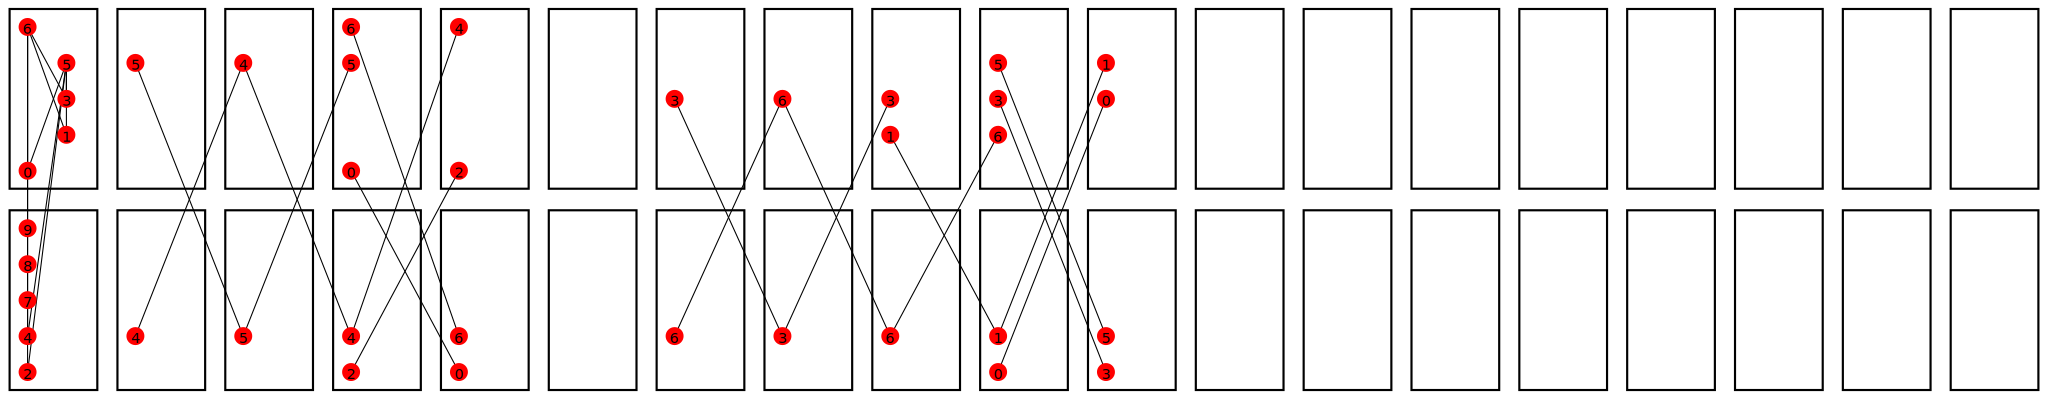

In [ ]:
res.draw()

In [9]:
for x in c.get_instructions("cx"):
    print(x.qubits)
    print(c.find_bit(x.qubits[1])[0])
#print(c.find_bit(5))

(Qubit(QuantumRegister(9, 'q'), 0), Qubit(QuantumRegister(9, 'q'), 5))
5
(Qubit(QuantumRegister(9, 'q'), 3), Qubit(QuantumRegister(9, 'q'), 5))
5
(Qubit(QuantumRegister(9, 'q'), 4), Qubit(QuantumRegister(9, 'q'), 5))
5
(Qubit(QuantumRegister(9, 'q'), 2), Qubit(QuantumRegister(9, 'q'), 5))
5
(Qubit(QuantumRegister(9, 'q'), 1), Qubit(QuantumRegister(9, 'q'), 6))
6
(Qubit(QuantumRegister(9, 'q'), 4), Qubit(QuantumRegister(9, 'q'), 6))
6
(Qubit(QuantumRegister(9, 'q'), 0), Qubit(QuantumRegister(9, 'q'), 6))
6
(Qubit(QuantumRegister(9, 'q'), 3), Qubit(QuantumRegister(9, 'q'), 6))
6
(Qubit(QuantumRegister(9, 'q'), 2), Qubit(QuantumRegister(9, 'q'), 7))
7
(Qubit(QuantumRegister(9, 'q'), 3), Qubit(QuantumRegister(9, 'q'), 7))
7
(Qubit(QuantumRegister(9, 'q'), 0), Qubit(QuantumRegister(9, 'q'), 7))
7
(Qubit(QuantumRegister(9, 'q'), 4), Qubit(QuantumRegister(9, 'q'), 7))
7
(Qubit(QuantumRegister(9, 'q'), 1), Qubit(QuantumRegister(9, 'q'), 8))
8
(Qubit(QuantumRegister(9, 'q'), 2), Qubit(QuantumRe

In [ ]:
#c = QuantumCircuit.from_qasm_file(circuit_file)
data_list = []
for x in c.get_instructions("cx"):
    data = c.find_bit(x.qubits[0])[0]
    if (data not in data_list):
        data_list.append(data)
print("data list", data_list)

data list [0, 1, 2, 3, 4]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
def make_plot(name, params):
    plt.figure(facecolor='white')
    #Dictionary format {"5-1-3 L6 Custom": [[1,2,3,4], [0.56,0.45, 0.64, 0.52]], "5-1-3 L6 Greedy": [[1,2,3,4], [0.63, 0.44, 0.35, 0.58]]}
    #NAME FORMAT EXAMPLES: 5-1-3 L6, 10,1,4 G2x3
    for param in params.keys():
        arr = param.split("_")
        mode = arr[-1]
        if ("C" == mode[0]):
            color = "lime"
            label = "Custom Improvement"
        elif ("J" == mode[0]):
            color = "cyan"
            label = "Jonathan's Method"
        elif ("G" == mode[0]):
            color = "red"
            label = "Greedy"
        elif ("A" == mode[0]):
            color = "orange"
            label = "Aggressive"
        elif ("R" == mode[0]):
            color = "magenta"
            label = "Random"
        elif ("P" == mode[0]):
            color = "pink"
            label = "PO"
        elif ("L" == mode[0]):
            color = "yellow"
            label = "LPFS"
        else:
            print("There's a naming error in graphs")
            assert(False)
        x = params_dict[param][0]
        y = params_dict[param][1]
        float_x = []
        float_y = []
        for element in x:
            float_x.append(float(element))
        for element in y:
            float_y.append(float(y)) 
        
        plt.plot(float_x, float_y, color=color, label=label)
    nameArr = name.split("_")
    prettyName = nameArr[0] + " " + nameArr[1]
    plt.xlabel(prettyName)
    plt.ylabel("Fidelity")
    plt.title("Test")
    
    plt.legend()
    nameString = name + ".png"
    plt.savefig(nameString, bbox_inches='tight')
    plt.show()

params_dict = {"5-1-3_L6_Custom": [[1,2,3,4], [0.56,0.45, 0.64, 0.52]], "5-1-3_L6_Greedy": [[1,2,3,4], [0.63, 0.44, 0.35, 0.58]]}
#make_plot([1,2,3,4],[0.56,0.45, 0.64, 0.52], "H6")
make_plot("5-1-3_L6", params_dict)


TypeError: float() argument must be a string or a number, not 'list'

<Figure size 432x288 with 0 Axes>

In [ ]:
import sys
import os
arr = os.listdir("../QCCDSim/sandbox")
print(arr)

['data.csv', 'data1A.csv', 'data2A.csv', 'data3A.csv', 'data4A.csv', 'dataPM.csv', 'outputFM.log', 'outputFM1A.log', 'outputFM2A.log', 'outputFM3A.log', 'outputFM4A.log', 'outputPM.log']


ancillas [5, 6, 7, 8]
OPENQASM 2.0;
include "qelib1.inc";
qreg q[9];
x q[0];
x q[3];
x q[4];
z q[0];
z q[2];
z q[4];
cx q[0],q[5];
cx q[3],q[5];
cx q[4],q[5];
cx q[2],q[5];
x q[1];
x q[4];
z q[0];
z q[3];
z q[4];
cx q[1],q[6];
cx q[4],q[6];
cx q[0],q[6];
cx q[3],q[6];
x q[2];
x q[3];
z q[0];
z q[3];
z q[4];
cx q[2],q[7];
cx q[3],q[7];
cx q[0],q[7];
cx q[4],q[7];
z q[1];
z q[2];
z q[3];
z q[4];
cx q[1],q[8];
cx q[2],q[8];
cx q[3],q[8];
cx q[4],q[8];

None


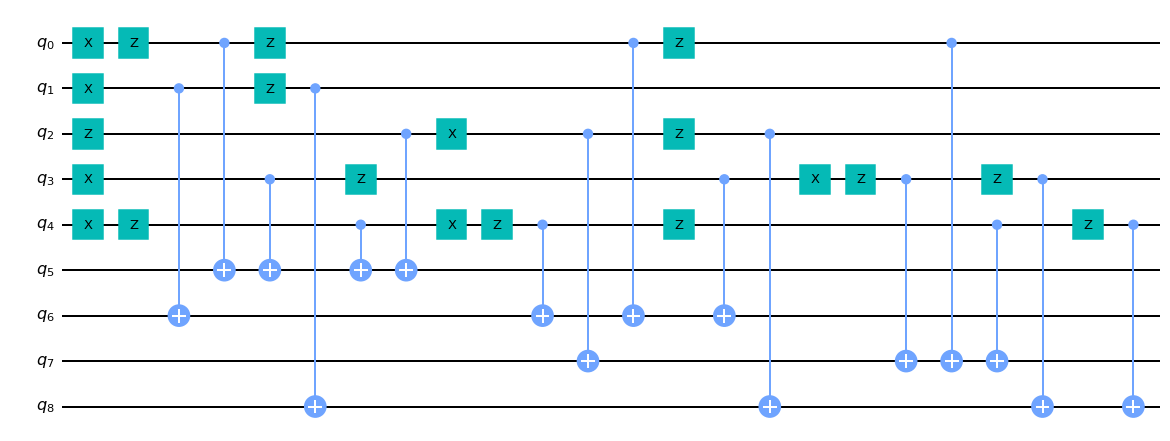

In [4]:
stabilizer_matrix = """[1 0 0 1 1 0|1 0 1 0 1 0]
[0 1 0 0 1 0|1 0 0 1 1 0]
[0 0 1 1 0 0|1 0 0 1 1 0]
[0 0 0 0 0 1|0 0 0 0 0 0]
[0 0 0 0 0 0|0 1 1 1 1 0]"""

other_stabilizer_matrix = """[1 0 0 1 1|1 0 1 0 1]
[0 1 0 0 1|1 0 0 1 1]
[0 0 1 1 0|1 0 0 1 1]
[0 0 0 0 0|0 1 1 1 1]"""

def parse_to_tuple(matrix, n): #n is the n in [[n,k,d]]
    arr = matrix.split("\n")
    x_arr = []
    z_arr = []
    cx_arr = []
    for x in arr:
        x_temp = []
        z_temp = []
        cx_temp = []
        splits = x.split("|")
        for i in range(len(splits)): #2 times
            side = splits[i]
            nums = side.split(" ")
            #print("nums", nums)
            assert(len(nums) == n)
            for j in range(len(nums)):
                number = nums[j]
                number = number.replace("[", "")
                number = number.replace("]", "")
                #print("number", number)
                if (int(number) == 1):
                    if (i == 0):
                        x_temp.append(j)
                    else:
                        assert(i == 1)
                        z_temp.append(j)
                    if (j not in cx_temp):
                        cx_temp.append(j)
        #print("x temp", x_temp)
        x_arr.append(x_temp)
        z_arr.append(z_temp)
        cx_arr.append(cx_temp)

    

    return (x_arr, z_arr, cx_arr, n)

def generate_circuit(input_tuple, numAncilla=1): #modify this later to be generate smart circuit
    x_arr, z_arr, cx_arr, n = input_tuple
    ancillas = []
    for i in range(numAncilla):
        ancilla = n + i
        ancillas.append(ancilla)
    print("ancillas", ancillas)
    circ = QuantumCircuit(n + numAncilla)
    ancilla_pointer = 0
    assert(len(x_arr) == len(z_arr))
    for row in range(len(x_arr)):

        x_gates = x_arr[row]
        z_gates = z_arr[row]
        cx_gates = cx_arr[row]
        for x in x_gates:
            circ.x(x)
        for z in z_gates:
            circ.z(z)
        for c in cx_gates:
            circ.cx(c, ancillas[ancilla_pointer])
        ancilla_pointer += 1
        ancilla_pointer = ancilla_pointer % len(ancillas)
    
    circ.qasm(formatted=True)
    return circ

input_tuple = parse_to_tuple(other_stabilizer_matrix, 5)
c = generate_circuit(input_tuple, 4)
c.draw(output="mpl")


In [5]:
circ = QuantumCircuit.from_qasm_file("../QCCDSim/no_cycles/circuits/5-1-3/5-1-3_code2Ancilla.qasm")
circ.draw(output="mpl")


SyntaxError: invalid syntax (1878812336.py, line 4)

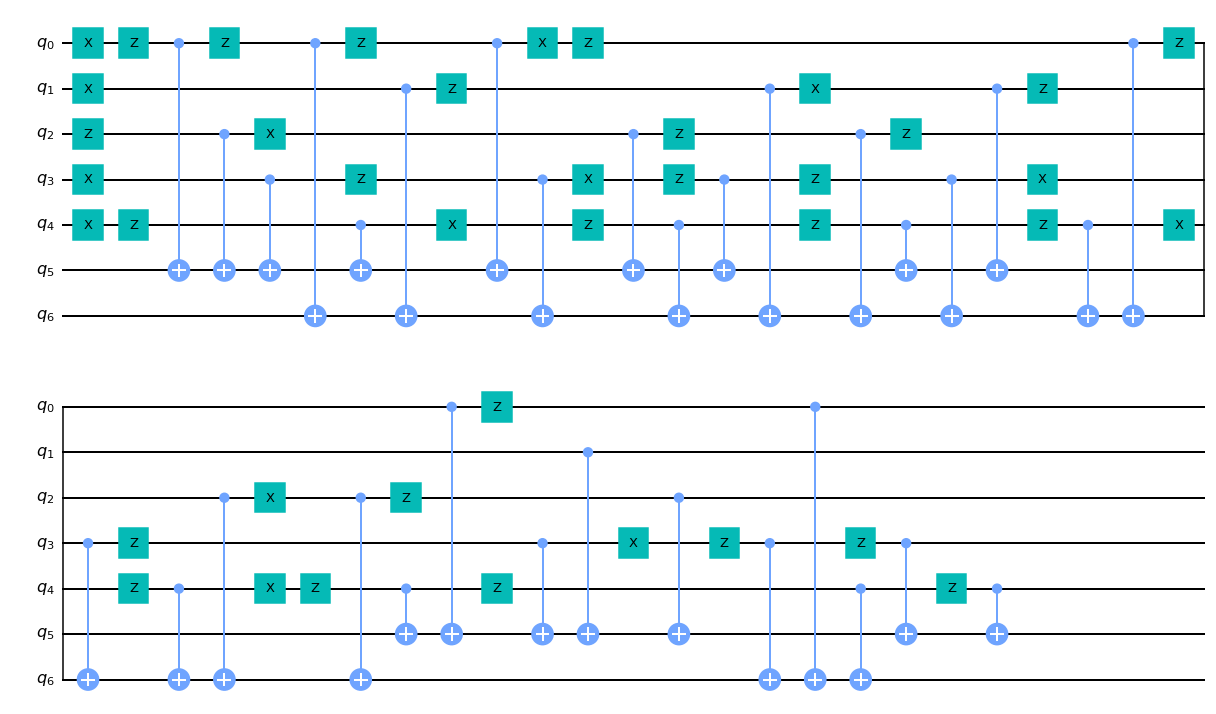

In [16]:
big_circ = QuantumCircuit.from_qasm_file("../QCCDSim/testCircuit.qasm")
big_circ.draw(output="mpl")
#new_circ = circ.repeat(2)
#new_circ.draw(output="mpl")
#output = circ.qasm(formatted=True)


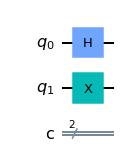

In [13]:
circ = QuantumCircuit(2,2)
circ.h(0)
circ.x(1)
circ.draw(output="mpl")

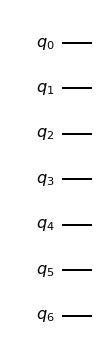

In [20]:
#new_circ = circ.compose(circ)
#new_circ.draw(output="mpl")
repeat_circ = big_circ
for i in range(5):
    repeat_circ = repeat_circ.compose(big_circ)
repeat_circ.draw(output="mpl")
temp_circ = QuantumCircuit(repeat_circ.num_qubits)
temp_circ.draw(output="mpl")

#repeat_circ.qasm(formatted=True)

In [32]:
circ = QuantumCircuit(6)
circ.x(0)
circ.h(1)
other = QuantumCircuit(6)
circ.h(0)
circ.x(1)
for i in range(5):
    circ.compose(other) #AHA, COMPOSE COMPOSES THE OBJECT IN PLACE
#total_circ.qasm(formatted=True)
circ.draw(output="mpl")
circ.qasm()
#from qiskit.quantum_info import Statevector
#Statevector.from_instruction(total_circ).equiv(Statevector.from_instruction(circ))
# I want qasm to say
#x[0]
#h[1]
#h[0]
#x[1]

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[6];\nx q[0];\nh q[1];\nh q[0];\nx q[1];\n'

In [37]:
with open('../QCCDSim/madeUPFilecode2Ancilla.qasm') as myfile:
    all_lines = 

OPENQASM 2.0;

include "qelib1.inc";

qreg q[7];

x q[0];

z q[0];

x q[1];

z q[2];

x q[3];

x q[4];

z q[4];

cx q[0],q[5];

z q[0];

cx q[2],q[5];

x q[2];

cx q[3],q[5];

z q[3];

cx q[4],q[5];

x q[4];

z q[4];

cx q[0],q[6];

z q[0];

cx q[0],q[5];

x q[0];

z q[0];

cx q[1],q[6];

z q[1];

cx q[2],q[5];

z q[2];

cx q[3],q[6];

x q[3];

z q[3];

cx q[3],q[5];

z q[3];

cx q[4],q[6];

cx q[1],q[6];

x q[1];

cx q[2],q[6];

z q[2];

cx q[3],q[6];

x q[3];

z q[4];

cx q[4],q[5];

cx q[0],q[5];

z q[0];

cx q[3],q[5];

z q[3];

z q[4];

cx q[4],q[6];

cx q[1],q[6];

z q[1];

x q[4];

z q[4];

cx q[4],q[5];

cx q[2],q[5];

x q[2];

cx q[2],q[5];

z q[2];

x q[4];

z q[4];

cx q[4],q[6];

cx q[0],q[6];

z q[0];

cx q[3],q[6];

cx q[1],q[6];

x q[1];

cx q[2],q[6];

z q[2];

x q[3];

z q[3];

cx q[3],q[5];

cx q[0],q[5];

x q[0];

z q[0];

z q[3];

cx q[3],q[6];

x q[3];

z q[4];

cx q[4],q[5];

cx q[1],q[5];

z q[1];

z q[4];

cx q[4],q[6];

cx q[0],q[6];

z q[0];

cx q[3],q[6];

z 

In [63]:
with open("../QCCDSim/circAtPointcode2Ancilla.qasm", 'r+') as myFile:
        all_lines = myFile.readlines()
        new_arr = []
        #print("all lines", all_lines)
        for i in range(len(all_lines)):
                if (i > 2):
                    new_arr.append(all_lines[i])
        #print(new_arr)   
        lengthOfBlock = 4 #len(allCircsArray)
        partitions = []
        for i in range(lengthOfBlock):
               text_block_size = len(new_arr)/lengthOfBlock
               assert(len(new_arr) % lengthOfBlock == 0)
               linesOfBlock = []
               block_size = int(text_block_size) 
               print("block size", block_size)
               for j in range(block_size):
                      linesOfBlock.append(new_arr[j + i*block_size])
               partitions.append(linesOfBlock)
        loop = []
        startIndex = 2
        endIndex = 3
        repetitions = 48
        total_cycles = 99
        denom = 2
        i = startIndex
        while (i <= endIndex):
                loop.append(partitions[i])
                i +=1
        for i in range(repetitions):
               for x in loop:
                      #write(x, "../QCCDSim/circAtPointcode2Ancilla.qasm")
                      for item in x:
                             myFile.write(item)
               
        currIndex = endIndex + (repetitions * denom)
        count = 0
        while (currIndex < total_cycles):
              for item in loop[count]:
                     myFile.write(item)
              count += 1
              currIndex +=1
               
        #print(partitions)
               

block size 36
block size 36
block size 36
block size 36


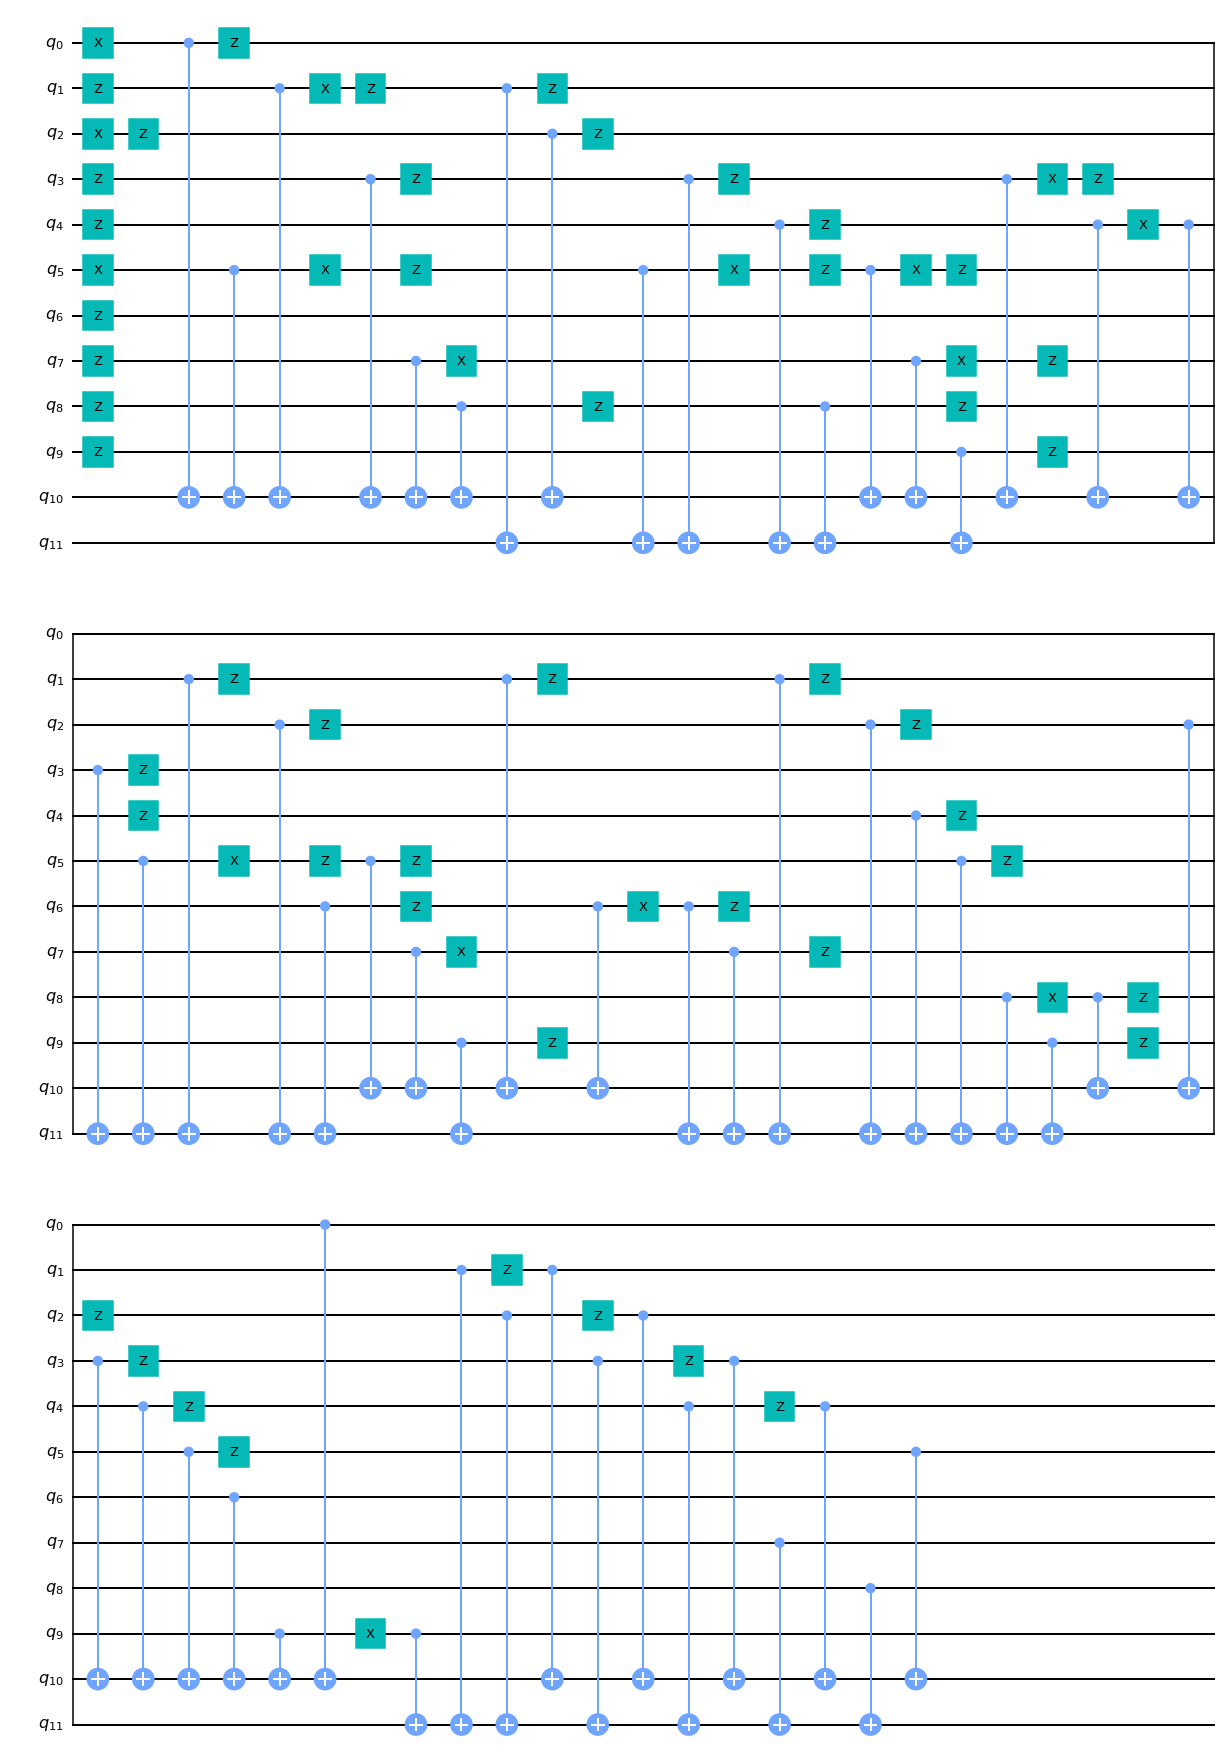

In [69]:
circ = QuantumCircuit.from_qasm_file("../QCCDSim/no_cycles/circuits/10-1-4/10-1-4_code2Ancilla.qasm")
circ.draw(output="mpl")

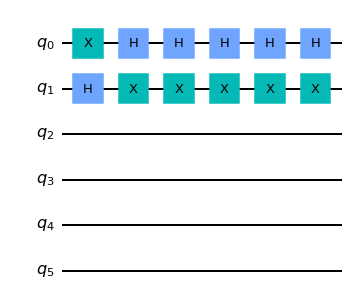

In [47]:
circ = QuantumCircuit(6)
circ.x(0)
circ.h(1)
other = QuantumCircuit(6)
other.h(0)
other.x(1)
#other.draw(output="mpl")
#circ.draw(output="mpl")
for i in range(5):
    circ = circ.compose(other)
circ.draw(output="mpl")

In [31]:
import circuit_generator
def get_modified_input_tuple(n, k, circString):
    ancilla_arr = circString.split("Ancilla")
    num = ancilla_arr[0][-1]
    ancilla = int(num)
    if (ancilla == 1):
         circSplit = circString.split("Ancilla")
         ancilla = ancilla + 1
         circSplit[0] = circSplit[0][:-1] + str(ancilla)
         newString = circSplit[0] + "Ancilla" + circSplit[1]
         #print(newString)
         return get_modified_input_tuple(n, k, newString)
    else:
        with open(circString, 'r+') as myFile:
            all_lines = myFile.readlines()
            new_arr = []
            #print("all lines", all_lines)
            for i in range(len(all_lines)):
                    if (i > 2):
                        new_arr.append(all_lines[i])
            #print(new_arr)
            good_arr = []
            for i in range(len(new_arr)):
                if ("h" not in new_arr[i]):
                    good_arr.append(new_arr[i])
            #print(good_arr)
            rhs = good_arr[0].split(",")[1]
            left = rhs.split("[")[1]
            right = left.split("]")[0]
            oldnum = int(right)
            cx_arr = []
            temp = []
            for x in good_arr:
                 rhs = x.split(",")[1]
                 left = rhs.split("[")[1]
                 right = left.split("]")[0]
                 num = int(right)
                 #print(num)
                 if (num == oldnum):
                    lhs = x.split(",")[0]
                    left = lhs.split("[")[1]
                    right = left.split("]")[0]
                    data = int(right)
                    temp.append(data)
                 else:
                    lhs = x.split(",")[0]
                    left = lhs.split("[")[1]
                    right = left.split("]")[0]
                    data = int(right)
                    cx_arr.append(temp.copy())
                    temp = []
                    temp.append(data)
                    oldnum = num
            cx_arr.append(temp) #last one
    return cx_arr, n
mine = get_modified_input_tuple(8,2,"../QCCDSim/SchedulingData/Circuits/8-2-3_code2Ancilla.qasm")[0]                      
print("my answer", mine)
matrix = """[1 0 0 0 1 0 0 0|0 0 0 0 1 1 1 1]
[0 1 0 0 1 1 0 1|0 0 0 1 1 0 0 0]
[0 0 1 0 1 1 0 1|0 1 0 0 1 1 1 0]
[0 0 0 1 0 1 0 0|0 1 1 1 1 0 1 1]
[0 0 0 0 0 0 1 1|0 0 1 0 0 0 1 0]
[0 0 0 0 0 0 0 0|1 1 1 1 1 1 1 1]"""
correct = circuit_generator.parse_to_tuple(matrix, 8)[2]
print("answer", correct)
print(mine == correct)


my answer [[0, 4, 5, 6, 7], [1, 4, 5, 7, 3], [2, 4, 5, 7, 1, 6], [3, 5, 1, 2, 4, 6, 7], [6, 7, 2], [0, 1, 2, 3, 4, 5, 6, 7]]
nums ['[1', '0', '0', '0', '1', '0', '0', '0']
nums ['0', '0', '0', '0', '1', '1', '1', '1]']
nums ['[0', '1', '0', '0', '1', '1', '0', '1']
nums ['0', '0', '0', '1', '1', '0', '0', '0]']
nums ['[0', '0', '1', '0', '1', '1', '0', '1']
nums ['0', '1', '0', '0', '1', '1', '1', '0]']
nums ['[0', '0', '0', '1', '0', '1', '0', '0']
nums ['0', '1', '1', '1', '1', '0', '1', '1]']
nums ['[0', '0', '0', '0', '0', '0', '1', '1']
nums ['0', '0', '1', '0', '0', '0', '1', '0]']
nums ['[0', '0', '0', '0', '0', '0', '0', '0']
nums ['1', '1', '1', '1', '1', '1', '1', '1]']
answer [[0, 4, 5, 6, 7], [1, 4, 5, 7, 3], [2, 4, 5, 7, 1, 6], [3, 5, 1, 2, 4, 6, 7], [6, 7, 2], [0, 1, 2, 3, 4, 5, 6, 7]]
True


In [37]:
import os
from qiskit import QuantumCircuit
programs = []
arr = os.listdir("../QCCDSim/Parallelization/Circuits")
for x in arr:
    programs.append("../QCCDSim/Parallelization/Circuits/" + x)
for x in programs:
    circ = QuantumCircuit.from_qasm_file(x)
    if (circ.depth() <= 30):
        print("Circ Name", x)
        print("Circ depth", circ.depth())

Circ Name ../QCCDSim/Parallelization/Circuits/10-4-3_code3Ancilla.qasm
Circ depth 30
Circ Name ../QCCDSim/Parallelization/Circuits/10-4-3_code4Ancilla.qasm
Circ depth 30
Circ Name ../QCCDSim/Parallelization/Circuits/10-4-3_code5Ancilla.qasm
Circ depth 30
Circ Name ../QCCDSim/Parallelization/Circuits/10-4-3_code6Ancilla.qasm
Circ depth 30
Circ Name ../QCCDSim/Parallelization/Circuits/5-1-3_code1Ancilla.qasm
Circ depth 17
Circ Name ../QCCDSim/Parallelization/Circuits/5-1-3_code2Ancilla.qasm
Circ depth 11
Circ Name ../QCCDSim/Parallelization/Circuits/5-1-3_code3Ancilla.qasm
Circ depth 11
Circ Name ../QCCDSim/Parallelization/Circuits/5-1-3_code4Ancilla.qasm
Circ depth 11
Circ Name ../QCCDSim/Parallelization/Circuits/8-2-3_code2Ancilla.qasm
Circ depth 24
Circ Name ../QCCDSim/Parallelization/Circuits/8-2-3_code3Ancilla.qasm
Circ depth 23
Circ Name ../QCCDSim/Parallelization/Circuits/8-2-3_code4Ancilla.qasm
Circ depth 23
Circ Name ../QCCDSim/Parallelization/Circuits/8-2-3_code5Ancilla.qasm
Ci

ancillas [5, 6, 7, 8]
OPENQASM 2.0;
include "qelib1.inc";
qreg q[18];
h q[0];
h q[1];
h q[2];
h q[3];
cx q[0],q[5];
cx q[3],q[5];
cx q[4],q[5];
cx q[2],q[5];
cx q[1],q[6];
cx q[4],q[6];
cx q[0],q[6];
cx q[3],q[6];
cx q[2],q[7];
cx q[3],q[7];
cx q[0],q[7];
cx q[4],q[7];
cx q[1],q[8];
cx q[2],q[8];
cx q[3],q[8];
cx q[4],q[8];
h q[0];
h q[1];
h q[2];
h q[3];
h q[9];
h q[10];
h q[11];
h q[12];
cx q[9],q[14];
cx q[12],q[14];
cx q[13],q[14];
cx q[11],q[14];
cx q[10],q[15];
cx q[13],q[15];
cx q[9],q[15];
cx q[12],q[15];
cx q[11],q[16];
cx q[12],q[16];
cx q[9],q[16];
cx q[13],q[16];
cx q[10],q[17];
cx q[11],q[17];
cx q[12],q[17];
cx q[13],q[17];
h q[9];
h q[10];
h q[11];
h q[12];
cx q[0],q[9];
cx q[1],q[10];
cx q[2],q[11];
cx q[3],q[12];
cx q[4],q[13];



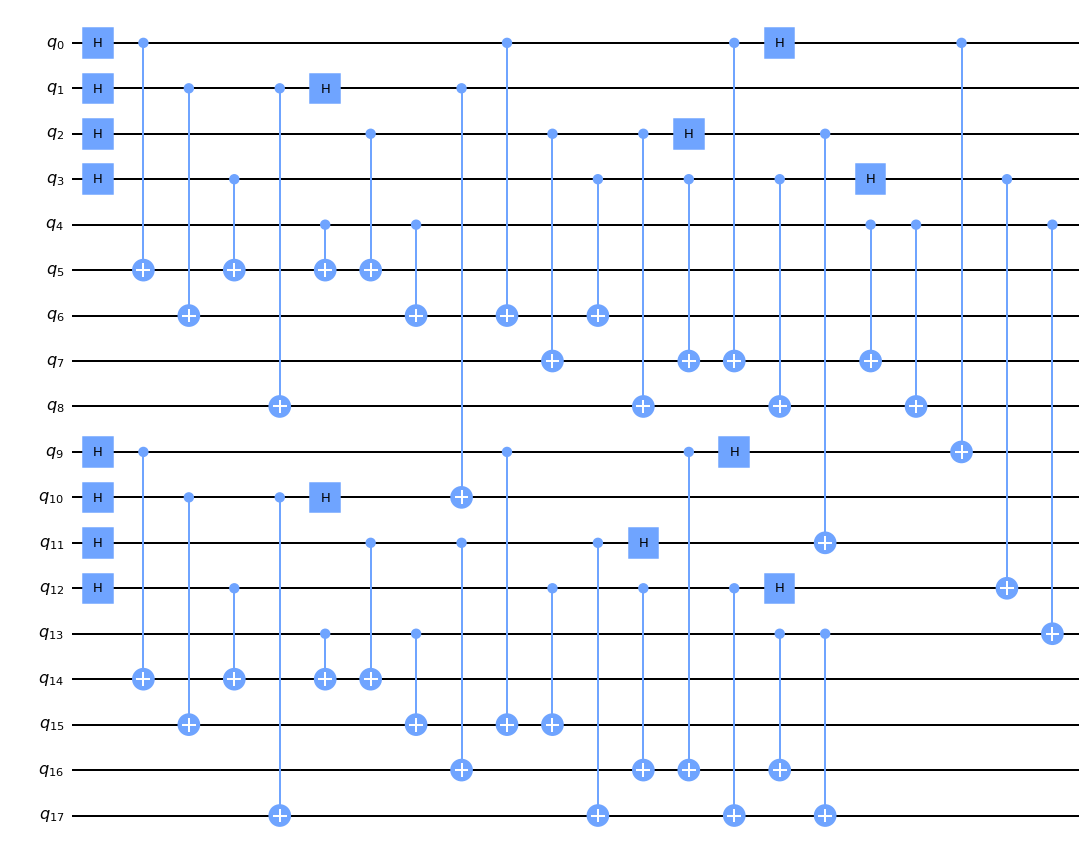

In [40]:
stabilizer_matrix = """[1 0 0 1 1|1 0 1 0 1]
[0 1 0 0 1|1 0 0 1 1]
[0 0 1 1 0|1 0 0 1 1]
[0 0 0 0 0|0 1 1 1 1]"""

def parse_to_tuple(matrix, n): #n is the n in [[n,k,d]]
    arr = matrix.split("\n")
    x_arr = []
    z_arr = []
    cx_arr = []
    for x in arr:
        x_temp = []
        z_temp = []
        cx_temp = []
        splits = x.split("|")
        for i in range(len(splits)): #2 times
            side = splits[i]
            nums = side.split(" ")
            #print("nums", nums)
            assert(len(nums) == n)
            for j in range(len(nums)):
                number = nums[j]
                number = number.replace("[", "")
                number = number.replace("]", "")
                #print("number", number)
                if (int(number) == 1):
                    if (i == 0):
                        x_temp.append(j)
                    else:
                        assert(i == 1)
                        z_temp.append(j)
                    if (j not in cx_temp):
                        cx_temp.append(j)
        #print("x temp", x_temp)
        x_arr.append(x_temp)
        z_arr.append(z_temp)
        cx_arr.append(cx_temp)

    

    return (x_arr, z_arr, cx_arr, n)

def generate_circuit_logical(input_tuple, numAncilla=1): #modify this later to be generate smart circuit
    x_arr, z_arr, cx_arr, n = input_tuple
    ancillas = []
    for i in range(numAncilla):
        ancilla = n + i
        ancillas.append(ancilla)
    print("ancillas", ancillas)
    circ = QuantumCircuit((n + numAncilla) * 2)
    offset = n + numAncilla
    ancilla_pointer = 0
    assert(len(x_arr) == len(z_arr))
    for i in range(len(cx_arr)):
        circ.h(i)
    for row in range(len(x_arr)):

        x_gates = x_arr[row]
        z_gates = z_arr[row]
        cx_gates = cx_arr[row]
        #for x in x_gates:
            #circ.x(x)
        #for z in z_gates:
            #circ.z(z)
        for c in cx_gates:
            circ.cx(c, ancillas[ancilla_pointer])
        ancilla_pointer += 1
        ancilla_pointer = ancilla_pointer % len(ancillas)
    for i in range(len(cx_arr)):
        circ.h(i)
    for i in range(len(cx_arr)):
        circ.h(i + offset)
    for row in range(len(x_arr)):

        x_gates = x_arr[row]
        z_gates = z_arr[row]
        cx_gates = cx_arr[row]
        #for x in x_gates:
            #circ.x(x + offset)
        #for z in z_gates:
            #circ.z(z + offset)
        for c in cx_gates:
            circ.cx(c + offset, ancillas[ancilla_pointer] + offset)
        ancilla_pointer += 1
        ancilla_pointer = ancilla_pointer % len(ancillas)
    for i in range(len(cx_arr)):
        circ.h(i + offset)
    for i in range(n):
        circ.cx(i, i + offset)
    circ.qasm(formatted=True, filename="LOGICAL5-1-3.qasm")
    return circ

input_tuple = parse_to_tuple(stabilizer_matrix, 5)
c = generate_circuit_logical(input_tuple, 4)
c.draw(output="mpl")